In [ ]:
!pip3 install opencv-contrib-python
!pip3 install opencv-python

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

In [ ]:
def brisk(image1, image2):
  # Initiate BRISK descriptor
  BRISK = cv.BRISK_create()

  # Find the keypoints and compute the descriptors for input
  keypoints1, descriptors1 = BRISK.detectAndCompute(image1, None)
  keypoints2, descriptors2 = BRISK.detectAndCompute(image2, None)

  print("Num of keypoints for image #1: {}, descriptors shape: {}".format(len(keypoints1), descriptors1.shape))
  print("Num of keypoints for image #2: {}, descriptors shape: {}".format(len(keypoints2), descriptors2.shape))

  return keypoints1, descriptors1, keypoints2, descriptors2

In [ ]:
def brut_match(keypoints1, descriptors1, keypoints2, descriptors2, image1, image2):
  # create BFMatcher object
  BFMatcher = cv.BFMatcher(normType = cv.NORM_HAMMING)

  # Matching descriptor vectors using Brute Force Matcher
  matches = BFMatcher.match(queryDescriptors = descriptors1,
                          trainDescriptors = descriptors2)

  # Sort them in the order of their distance
  matches = sorted(matches, key = lambda x: x.distance)

  res = cv.drawMatches(image1, keypoints1, image2, keypoints2, matches[:15], None, flags=2)
  plt.figure(figsize=(20,20))
  plt.imshow(res) 
  plt.show()

In [ ]:
def handwrite_matcher(keypoints1, descriptors1, keypoints2, descriptors2, image1, image2):

    matches = []
    for i, k1 in enumerate(descriptors1):
        for j, k2 in enumerate(descriptors2):
            matches.append(cv.DMatch(_distance=cv.norm((k1 - k2), cv.NORM_HAMMING), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)

    res = cv.drawMatches(image1, keypoints1, image2, keypoints2, matches[:15], None,
    flags=2)
    plt.figure(figsize=(20,20))
    plt.imshow(res) 
    plt.show()

In [ ]:
img1_orig = cv.imread(filename = 'image1_orig.jpg',
                   flags = cv.IMREAD_GRAYSCALE)

img1_cropped = cv.imread(filename = 'image1_cropped.jpg',
                   flags = cv.IMREAD_GRAYSCALE)


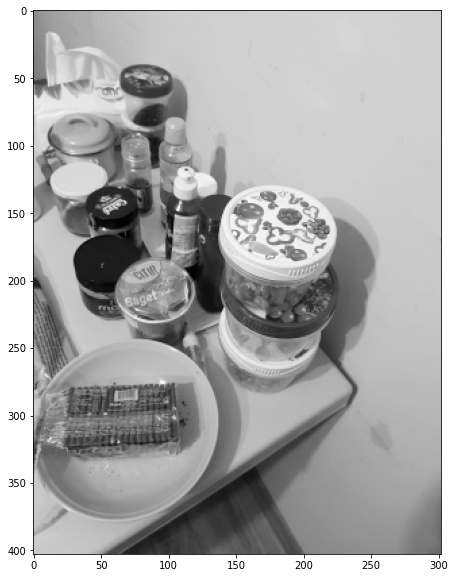

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img1_orig, cmap='gray')

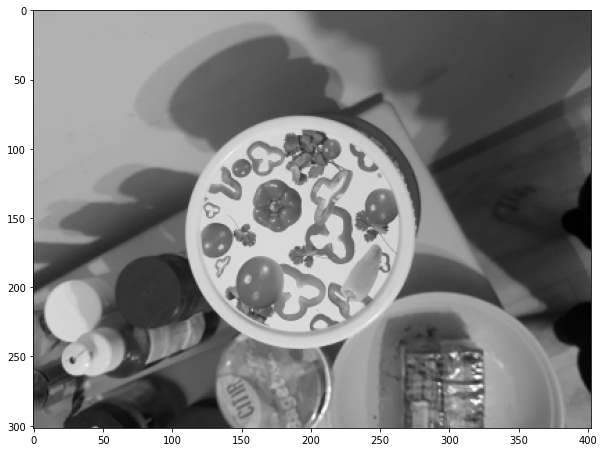

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img1_cropped, cmap='gray')

Num of keypoints for image #1: 969, descriptors shape: (969, 64)
Num of keypoints for image #2: 949, descriptors shape: (949, 64)


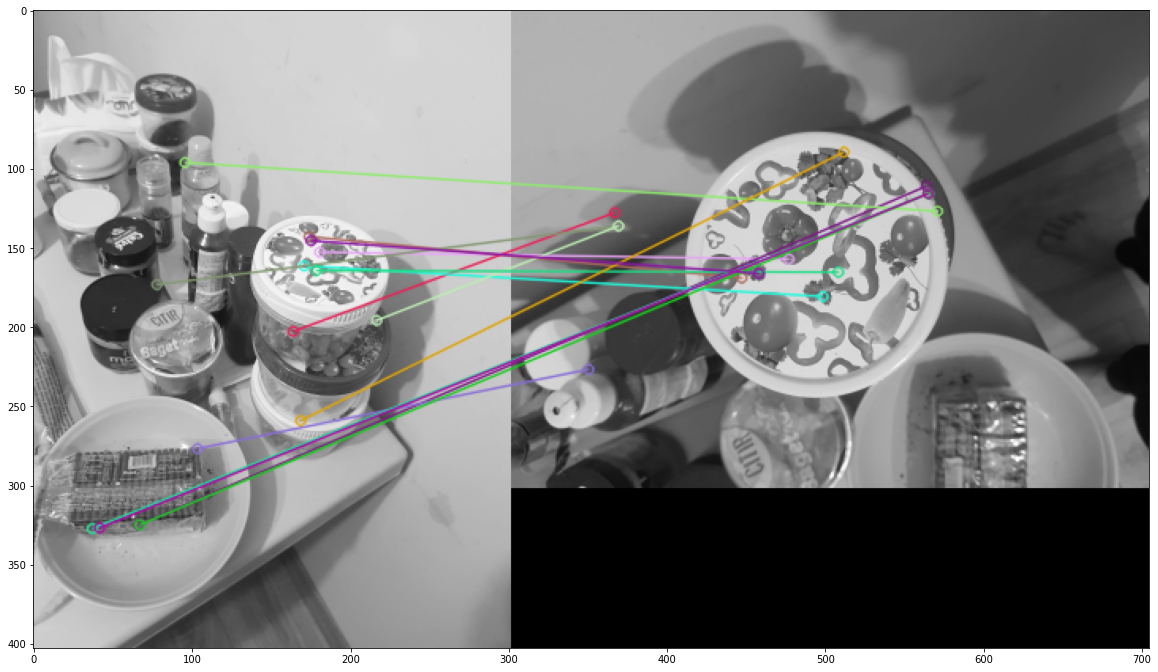

In [ ]:
keypoints1, descriptors1, keypoints2, descriptors2 = brisk(img1_orig, img1_cropped)
brut_match(keypoints1, descriptors1, keypoints2, descriptors2, img1_orig, img1_cropped)

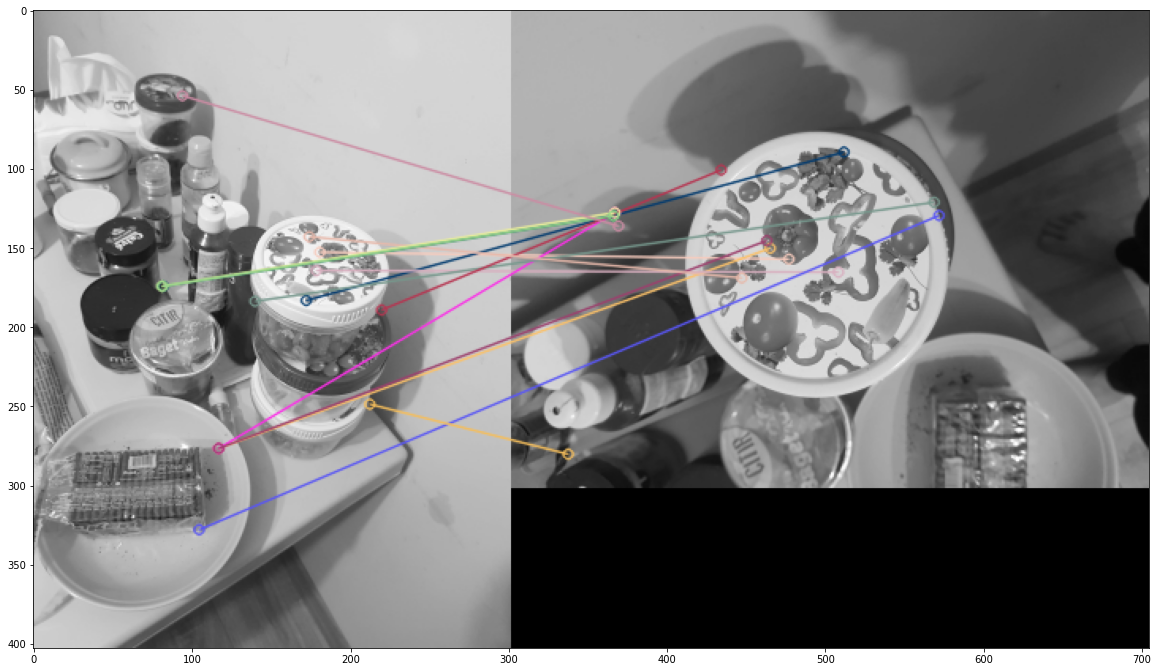

In [ ]:
handwrite_matcher(keypoints1, descriptors1, keypoints2, descriptors2, img1_orig, img1_cropped)

In [ ]:
img2_orig = cv.imread(filename = 'image2_orig.jpg',
                   flags = cv.IMREAD_GRAYSCALE)

img2_cropped = cv.imread(filename = 'image2_cropped.jpg',
                   flags = cv.IMREAD_GRAYSCALE)


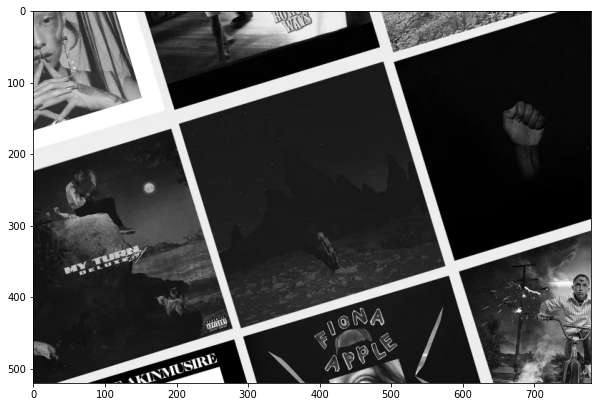

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img2_orig, cmap='gray')

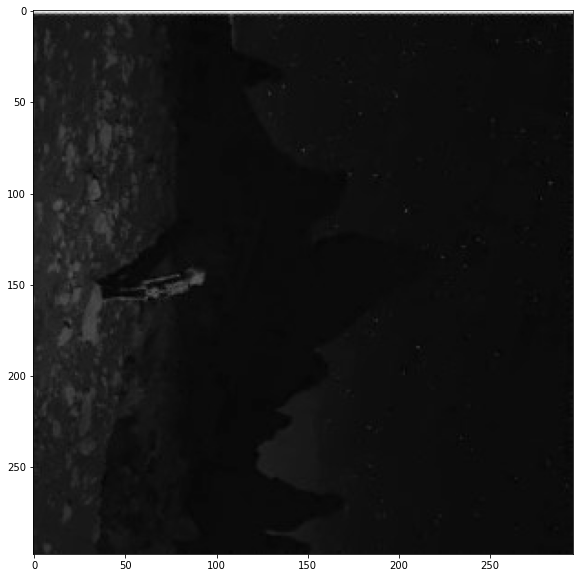

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img2_cropped, cmap='gray')

Num of keypoints for image #1: 1762, descriptors shape: (1762, 64)
Num of keypoints for image #2: 15, descriptors shape: (15, 64)


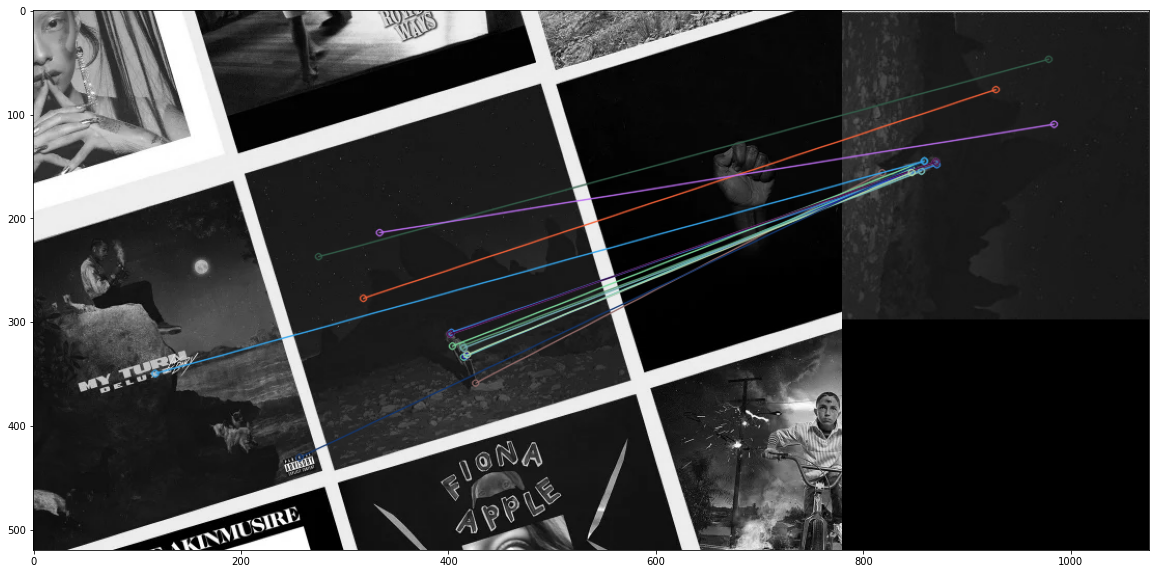

In [ ]:
keypoints1, descriptors1, keypoints2, descriptors2 = brisk(img2_orig, img2_cropped)
brut_match(keypoints1, descriptors1, keypoints2, descriptors2, img2_orig, img2_cropped)

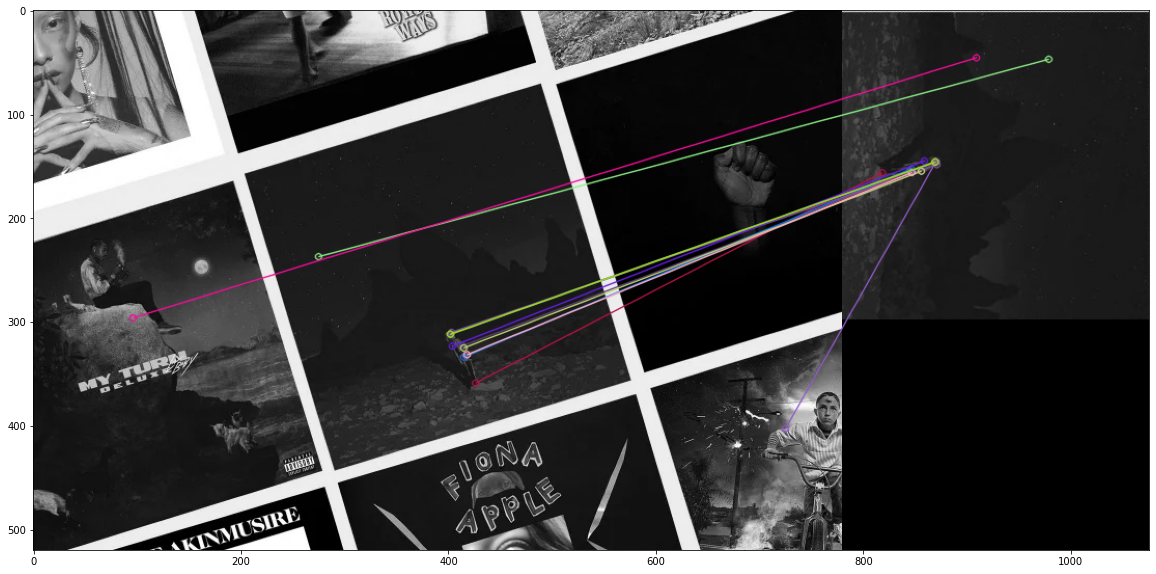

In [ ]:
handwrite_matcher(keypoints1, descriptors1, keypoints2, descriptors2, img2_orig, img2_cropped)